In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'module3-introduction-to-bayesian-inference'))
	# print(os.getcwd())
except:
	pass

 # Lambda School Data Science Module 133

 ## Introduction to Bayesian Inference




 ## Assignment - Code it up!

 Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

 Specific goals/targets:

 1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
 2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
 3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
 4. In your own words, summarize the difference between Bayesian and Frequentist statistics

 Bayesian statistics take into account prior known data, and provide more accurate estimates for smaller datasets. Frequentist statistics consider the sample in a vacuum, and do not require prior known data.

 If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

 Stretch goals:

 - Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
 - Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
 - Take PyMC3 further - see if you can build something with it!

In [2]:
def prob_drunk_given_positive(prob_drunk_prior=0.001, prob_positive=0.08,prob_positive_drunk=1.0):
	"""
	Returns the Bayesian probability that a person is drunk,
	given a positive result in a breathalyzer test

	Arguments:
		prob_drunk_prior (float, optional, default: 0.001): Probability that a person in the prior population is drunk
		prob_positive (float, optional, default: 0.08): Probability a breathalyzer gives a false positive
		prob_positive_drunk (float, optional, default: 1.0): Probability a breathalyzer gives a true positive

	Returns:
		(float): Probability a person is drunk, given a positive breathalyzer result
	"""

	return(prob_positive_drunk * prob_drunk_prior / 
		(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior)))


In [3]:
prior = 0.001
priors = [prior]
for i in range(1,11):
	prior = prob_drunk_given_positive(prob_drunk_prior=prior)
	print(f'Probability of a driver being drunk after {i} positive breathalyzer results: {prior}')
	priors.append(prior)


Probability of a driver being drunk after 1 positive breathalyzer results: 0.012357884330202669
Probability of a driver being drunk after 2 positive breathalyzer results: 0.13525210993291495
Probability of a driver being drunk after 3 positive breathalyzer results: 0.6615996951348605
Probability of a driver being drunk after 4 positive breathalyzer results: 0.9606895076105054
Probability of a driver being drunk after 5 positive breathalyzer results: 0.9967371577896734
Probability of a driver being drunk after 6 positive breathalyzer results: 0.9997381867081508
Probability of a driver being drunk after 7 positive breathalyzer results: 0.9999790498904363
Probability of a driver being drunk after 8 positive breathalyzer results: 0.9999983239589307
Probability of a driver being drunk after 9 positive breathalyzer results: 0.9999998659165077
Probability of a driver being drunk after 10 positive breathalyzer results: 0.9999999892733192


In [4]:
frequentist = []
for i in range(0,11):
	frequentist.append((1-0.08**i)*.999+0.001)
	# Probability that n breathalyzer tests have returned false positives, plus the base drunk probability


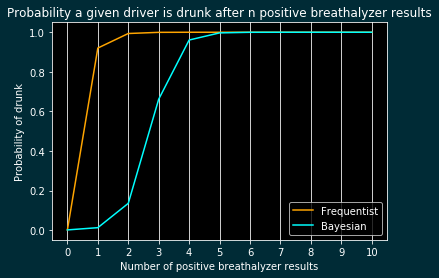

In [5]:
import matplotlib.pyplot as pyplot

pyplot.plot(frequentist, color='orange')
pyplot.plot(priors, color='cyan')
pyplot.grid(which='both', axis='x')
pyplot.xticks(range(0,11))
pyplot.gcf().patch.set(facecolor='#002B36')
pyplot.xlabel('Number of positive breathalyzer results')
pyplot.ylabel('Probability of drunk')
pyplot.title('Probability a given driver is drunk after n positive breathalyzer results')
pyplot.legend(['Frequentist', 'Bayesian'])

pyplot.show()


In [6]:

import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as pyplot

cols = ['party','handicapped-infants','water-project',
		'budget','physician-fee-freeze', 'el-salvador-aid',
		'religious-groups','anti-satellite-ban',
		'aid-to-contras','mx-missile','immigration',
		'synfuels', 'education', 'right-to-sue','crime','duty-free',
		'south-africa']
get_ipython().system('wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')


df = pandas.read_csv('house-votes-84.data',
               header=None,
               names=cols).replace({'?':numpy.NaN, 'n':0, 'y':1})
df.head()


--2019-09-18 15:36:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Server file no newer than local file ‘house-votes-84.data’ -- not retrieving.



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [7]:
democrats = df[df['party']=='democrat']
republicans = df[df['party']=='republican']

print('bayes_mvs: ', scipy.stats.bayes_mvs(democrats['budget'].dropna(), alpha=0.95)[0])

mean = democrats['budget'].mean()
n = democrats['budget'].count()
dof = n-1
std_err = numpy.std(democrats['budget'],ddof=1) / numpy.sqrt(n)
print('Frequentist: ', (mean, scipy.stats.t.interval(0.95, dof, loc=mean, scale=std_err)))


bayes_mvs:  Mean(statistic=0.8884615384615384, minmax=(0.8499435153340716, 0.9269795615890052))
Frequentist:  (0.8884615384615384, (0.8499435153340716, 0.9269795615890052))


 ## Resources

 - [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
 - [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)